## 
1. Store,train, test파일

# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb

# 데이터 읽기

In [2]:
train = pd.read_csv("/users/user/module37/train.csv")
store = pd.read_csv("/users/user/module37/store.csv")
test = pd.read_csv("/users/user/module37/test.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_5544\2167040423.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/users/user/module37/train.csv")


## train 가공 (크기,head,결측값(있을 시 0으로),info)

In [3]:
print(train.shape)
print(train.head())

(1017209, 9)
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [4]:
len(train)

1017209

In [5]:
train = train.iloc[:379436]   # 필요한 데이터 갯수가 379,436개여서 잘라 냈다.

In [6]:
len(train)

379436

In [7]:
print(train.info)

<bound method DataFrame.info of         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           1          5  2015-07-31   5263        555     1      1   
1           2          5  2015-07-31   6064        625     1      1   
2           3          5  2015-07-31   8314        821     1      1   
3           4          5  2015-07-31  13995       1498     1      1   
4           5          5  2015-07-31   4822        559     1      1   
...       ...        ...         ...    ...        ...   ...    ...   
379431   1112          5  2014-08-01  10058        821     1      1   
379432   1113          5  2014-08-01   7618        723     1      1   
379433   1114          5  2014-08-01  22827       3748     1      1   
379434   1115          5  2014-08-01   8580        514     1      1   
379435      1          4  2014-07-31   5106        575     1      1   

       StateHoliday  SchoolHoliday  
0                 0              1  
1                 0              1  
2   

In [8]:
print(train.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


## train과 동일하게 test와 store도 동일한 작업 해준다.

In [9]:
print(test.head())
print(len(test))
print(test.info)
print(test.isnull().sum())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
41088
<bound method DataFrame.info of           Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...

In [10]:
test=test.fillna(0)   #결측값을 0으로 대체 함

In [11]:
print(test.isnull().sum())

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [12]:
print(store.head())
print(len(store))
print(store.info)
print(store.isnull().sum())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [13]:
store=store.fillna(0)   #결측값을 0으로 대체 함
print(store.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [14]:
train.nunique() #각 칼럼의 이름과 값 갯수 확인

Store             1115
DayOfWeek            7
Date               366
Sales            18510
Customers         3662
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [15]:
# 아래의 두개는 그래프를 그린 것 인데 , 1번은 데이터싀 속성을 이해 못하고 그냥 때려박은 거 
# 아래는 속성값

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

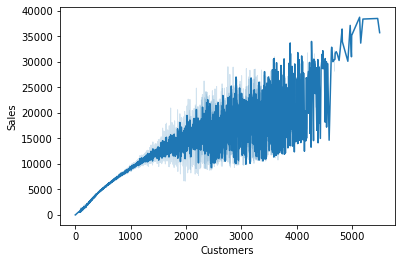

In [16]:
sb.lineplot(x=train['Customers'],y=train['Sales'], data='train')

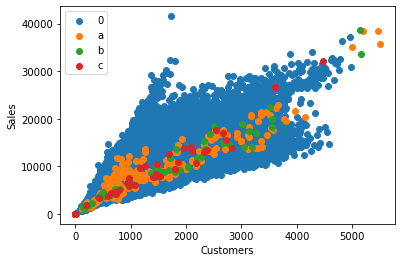

In [17]:
for i in ["0", "a", "b", "c"]:
    data = train[train['StateHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

### 4. 매장별 통계 데이터 확인해보기
      4.1 spc = sales/customer 로 새로운 열 생성 >> train.csv df
      4.2 Groupby 이용 store로 sales,customers, spc 평균값 만들어보기 : store별 평균값 data

In [18]:
#4.1
train['spc']= train['Sales']/train['Customers']

In [19]:
#4.2  1번째 방법 sales만 그룹화 시켜서, 새로운 행 

In [20]:
group = train.groupby(['Store'])  # store에 그룹화

group.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,spc
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118
...,...,...,...,...,...,...,...,...,...,...
5570,1111,1,2015-07-27,7742,515,1,1,0,1,15.033010
5571,1112,1,2015-07-27,14383,946,1,1,0,1,15.204017
5572,1113,1,2015-07-27,7582,684,1,1,0,1,11.084795
5573,1114,1,2015-07-27,26720,3468,1,1,0,1,7.704729


In [24]:
df_data = pd.DataFrame()
df_data['Sales_Mean']=pd.DataFrame(group['Sales'].mean())
df_data['avg_customers']=pd.DataFrame(group['Customers'].mean())
df_data['SalesPerCustomer']=pd.DataFrame(group['spc'].mean())

In [ ]:
# #4.2 두번 째 방법 groupby를 이용해 한방에 하기 ( 아직 완성 못함...ㅜ store가 하나의 행렬값으로 가져가기가...?)
# Mean_Sales_Store=train.groupby('Store')['Sales'].apply(lambda x:x.fillna(x.mean()))
# Mean_Sales_Store.info

In [ ]:
# Mean_Customers_Store=train.groupby('Store')['Customers'].apply(lambda x:x.fillna(x.mean()))
# Mean_Customers_Store.head(5)

In [ ]:
# Mean_Customers_Store=train.groupby('Store')['spc'].apply(lambda x:x.fillna(x.mean()))
# Mean_Customers_Store.head(5)

### 5. store df 에 4번에서 생성된 컬럼 merge 시키기 >>store df columns:

In [25]:
# 5. 
store=pd.merge(store,df_data,on='Store',how='inner')
print(store)
print(store.nunique())


      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0        

### 6. Train df에 store df merge 시키키(기준은 store명 기준으로)

In [26]:
#6
train=pd.merge(train,store,on='Store',how='inner')
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,spc,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales_Mean,avg_customers,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3884.122951,453.65847,8.509011
1,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3884.122951,453.65847,8.509011
2,1,3,2015-07-29,4782,523,1,1,0,1,9.143403,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3884.122951,453.65847,8.509011
3,1,2,2015-07-28,5011,560,1,1,0,1,8.948214,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3884.122951,453.65847,8.509011
4,1,1,2015-07-27,6102,612,1,1,0,1,9.970588,...,1270.0,9.0,2008.0,0,0.0,0.0,0,3884.122951,453.65847,8.509011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379431,1115,2,2014-08-05,7028,459,1,1,0,1,15.311547,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5821.553425,391.49589,14.739258
379432,1115,1,2014-08-04,8457,543,1,1,0,1,15.574586,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5821.553425,391.49589,14.739258
379433,1115,7,2014-08-03,0,0,0,0,0,1,NaN,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5821.553425,391.49589,14.739258
379434,1115,6,2014-08-02,6455,458,1,0,0,1,14.093886,...,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5821.553425,391.49589,14.739258


### 7. train df에서 data를 year,Month,day,week로 변환하여 각각 컬럼 생성

In [27]:
train['Date']=pd.to_datetime(train['Date'])
train['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 379436 entries, 0 to 379435
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
379436 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 MB


In [28]:
train['Year'] = train['Date'].dt.year
train['Weekday'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day

print(train)
print(train['Year'].dtype)

        Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0           1          5 2015-07-31   5263        555     1      1   
1           1          4 2015-07-30   5020        546     1      1   
2           1          3 2015-07-29   4782        523     1      1   
3           1          2 2015-07-28   5011        560     1      1   
4           1          1 2015-07-27   6102        612     1      1   
...       ...        ...        ...    ...        ...   ...    ...   
379431   1115          2 2014-08-05   7028        459     1      1   
379432   1115          1 2014-08-04   8457        543     1      1   
379433   1115          7 2014-08-03      0          0     0      0   
379434   1115          6 2014-08-02   6455        458     1      0   
379435   1115          5 2014-08-01   8580        514     1      1   

       StateHoliday  SchoolHoliday        spc  ... Promo2 Promo2SinceWeek  \
0                 0              1   9.482883  ...      0             0.0   
1    

### 8. competition/promotion에 대한 진행 여부 계산하기

In [29]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'spc', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Sales_Mean', 'avg_customers',
       'SalesPerCustomer', 'Year', 'Weekday', 'Day'],
      dtype='object')

In [30]:
def build_features(train, store):
    # 문자열 유형을 정수로 변환
    store['StoreType'] = store['StoreType'].astype('category').cat.codes
    store['Assortment'] = store['Assortment'].astype('category').cat.codes
    train["StateHoliday"] = train["StateHoliday"].astype('category').cat.codes
    # merged = pd.merge(train, store, on='Store', how='left')
    merged = train
    print(merged.columns)
    # NaN 제거
    NaN_replace = 0
    merged.fillna(NaN_replace, inplace=True)
    merged['Year'] = merged.Date.dt.year
    merged['Month'] = merged.Date.dt.month
    merged['Day'] = merged.Date.dt.day
    merged['Week'] = merged.Date.dt.week
    # 경쟁이 존재한 개월 수
    merged['MonthsCompetitionOpen'] = \
        12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + \
        (merged['Month'] - merged['CompetitionOpenSinceMonth'])
    merged.loc[merged['CompetitionOpenSinceYear'] ==
               NaN_replace, 'MonthsCompetitionOpen'] = NaN_replace
    # 프로모션이 존재한 주 수
    merged['WeeksPromoOpen'] = \
        12 * (merged['Year'] - merged['Promo2SinceYear']) + \
        (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
    merged.loc[merged['Promo2SinceYear'] ==
               NaN_replace, 'WeeksPromoOpen'] = NaN_replace
    toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek',
        'Promo2SinceYear',
        'MonthsCompetitionOpen',
        'WeeksPromoOpen'
    ]
    merged[toInt] = merged[toInt].astype(int)
    return merged

med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
med_store.rename(columns=lambda x: 'Med' + x, inplace=True)

store = pd.merge(med_store.reset_index(), store, on='Store')


features = build_features(train, store)
features.head()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'spc', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Sales_Mean', 'avg_customers',
       'SalesPerCustomer', 'Year', 'Weekday', 'Day'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_5544\1706110079.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged['Week'] = merged.Date.dt.week
C:\Users\user\AppData\Local\Temp\ipykernel_5544\1706110079.py:25: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,spc,...,Sales_Mean,avg_customers,SalesPerCustomer,Year,Weekday,Day,Month,Week,MonthsCompetitionOpen,WeeksPromoOpen
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,3884.122951,453.65847,8.509011,2015,7,31,7,31,82,0
1,1,4,2015-07-30,5020,546,1,1,1,1,9.194139,...,3884.122951,453.65847,8.509011,2015,7,30,7,31,82,0
2,1,3,2015-07-29,4782,523,1,1,1,1,9.143403,...,3884.122951,453.65847,8.509011,2015,7,29,7,31,82,0
3,1,2,2015-07-28,5011,560,1,1,1,1,8.948214,...,3884.122951,453.65847,8.509011,2015,7,28,7,31,82,0
4,1,1,2015-07-27,6102,612,1,1,1,1,9.970588,...,3884.122951,453.65847,8.509011,2015,7,27,7,31,82,0


### 9. train Df에서 label,features 컬럼 나누기 X,y


In [45]:
print(train.columns)
print(test.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'spc', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Sales_Mean', 'avg_customers',
       'SalesPerCustomer', 'Year', 'Weekday', 'Day', 'Month', 'Week',
       'MonthsCompetitionOpen', 'WeeksPromoOpen'],
      dtype='object')
Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


In [50]:
test=test.drop(['Date','Id','StateHoliday','SchoolHoliday'],axis=1)

In [63]:
features = ['Store', 'DayOfWeek', 'Open', 'Promo']

target = ['Sales']

X = train[features]
y = train[target]

In [65]:
print(X['Store'].dtype)
print(X['DayOfWeek'].dtype)
print(X['Open'].dtype)
print(X['Promo'].dtype)

int64
int64
int64
int64


In [85]:
print(len(X))
print(len(y))

379436
379436


### 10. X,y 데이터셋을 train,test로 나누기

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, train_size=0.8)  #랜덤스플릿

### 회귀(예측)Ai 모델 선택하기:linear regression, logistic regression(메모리 부족으로 안됌), ridge regression, lasso regression, polynomial regression 
// train에 있는 컬럼 test에 있는 컬럼이랑 sales빼곤 다 똑같아야 함.(컬럼 갯수가 동일해야 한다고 말하는거임)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: Unable to allocate 40.1 GiB for an array with shape (303548, 17713) and data type int64

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
line_fitter = LinearRegression()
line_fitter.fit(X, y)

LinearRegression()

In [90]:
y_predicted = line_fitter.predict(X_test)

In [91]:
print(y_predicted)

[[6135.21011296]
 [8430.23216083]
 [8282.19370182]
 ...
 [8159.48118853]
 [8171.10066475]
 [6540.43408782]]


In [92]:
#절편을 출력합니다:
print(line_fitter.intercept_)
#기울기를 출력합니다:
print(line_fitter.coef_)

[687.81516728]
[[ 2.82026122e-02 -1.30270813e+02  5.96653222e+03  2.01287722e+03]]


In [93]:
print(len(y_test))
print(len(y_predicted))

75888
75888


In [94]:
print ("Linear Regression Score")
predict = line_fitter.predict(X_test)
print ("Mean Absolute Error: ", mean_absolute_error(y_test,y_predicted))
print ("Mean Squared Error: ", mean_squared_error(y_test,y_predicted))
print ("R2: ", r2_score(y_test,y_predicted))

Linear Regression Score
Mean Absolute Error:  1811.4024630343833
Mean Squared Error:  7132000.614908523
R2:  0.5366379802524954


### ridge regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge


In [96]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [98]:
y_pred_ridge=ridge.predict(X_test)
print("lr.coef_: {}".format(ridge.coef_))
print("lr.intercept_ : {}".format(ridge.intercept_))

lr.coef_: [[ 3.43487476e-02 -1.30178630e+02  5.96721064e+03  2.01037133e+03]]
lr.intercept_ : [683.67984454]


In [99]:
print ("Linear Regression Score")
ridge_predict = ridge.predict(X_test)
print ("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred_ridge))
print ("Mean Squared Error: ", mean_squared_error(y_test,y_pred_ridge))
print ("R2: ", r2_score(y_test,y_pred_ridge))

Linear Regression Score
Mean Absolute Error:  1811.2874664518195
Mean Squared Error:  7132055.070557587
R2:  0.5366344422999769


In [102]:
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print('\nMSE : {0:.3f}, RMSE : {1:.3F}\n'.format(mse, rmse))
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_test, y_pred_ridge)))


MSE : 7132055.071, RMSE : 2670.591


r2 Variance score  0.537



### LASSO

In [104]:
from sklearn.linear_model import Lasso

In [105]:
lasso = Lasso().fit(X_train, y_train)
y_pred_la=lasso.predict(X_test)
print("lr.coef_: {}".format(lasso.coef_))

print("lr.intercept_ : {}".format(lasso.intercept_))

lr.coef_: [ 3.43300013e-02 -1.31149029e+02  5.95896011e+03  2.00655172e+03]
lr.intercept_ : [695.96672845]


In [106]:
mse = mean_squared_error(y_test, y_pred_la)
rmse = np.sqrt(mse)
print('\nMSE : {0:.3f}, RMSE : {1:.3F}\n'.format(mse, rmse))
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_test, y_pred_la)))


MSE : 7132083.605, RMSE : 2670.596


r2 Variance score  0.537



### 13 test.csv 파일로 판매량 예측하기 >> submission_000.csv 파일로 예측 판매량 제출 (본인이름)

In [107]:
test.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo'], dtype='object')

In [108]:
print(train.head())
test.info()

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             1   
1      1          4 2015-07-30   5020        546     1      1             1   
2      1          3 2015-07-29   4782        523     1      1             1   
3      1          2 2015-07-28   5011        560     1      1             1   
4      1          1 2015-07-27   6102        612     1      1             1   

   SchoolHoliday       spc  ...   Sales_Mean avg_customers  SalesPerCustomer  \
0              1  9.482883  ...  3884.122951     453.65847          8.509011   
1              1  9.194139  ...  3884.122951     453.65847          8.509011   
2              1  9.143403  ...  3884.122951     453.65847          8.509011   
3              1  8.948214  ...  3884.122951     453.65847          8.509011   
4              1  9.970588  ...  3884.122951     453.65847          8.509011   

   Year  Weekday  Day  Month  Week MonthsCom

In [109]:
y_pred_la=lasso.predict(test)
y_pred_la


array([8136.9167776 , 8136.9854376 , 8137.1227576 , ..., 5906.24195866,
       5906.27628867, 5906.31061867])

In [110]:
best=pd.DataFrame(y_pred_la)

In [111]:
best.rename(columns = {0:'Sales'}, inplace =True)

In [112]:
best

,Sales
0,8136.916778
1,8136.985438
2,8137.122758
3,8137.157088
4,8137.191418
...,...
41083,5906.173299
41084,5906.207629
41085,5906.241959
41086,5906.276289


In [113]:
test['Sales']=best
test

,Store,DayOfWeek,Open,Promo,Sales
0,1,4,1.0,1,8136.916778
1,3,4,1.0,1,8136.985438
2,7,4,1.0,1,8137.122758
3,8,4,1.0,1,8137.157088
4,9,4,1.0,1,8137.191418
...,...,...,...,...,...
41083,1111,6,1.0,0,5906.173299
41084,1112,6,1.0,0,5906.207629
41085,1113,6,1.0,0,5906.241959
41086,1114,6,1.0,0,5906.276289


In [115]:
test.to_csv("best_capston_황종민.csv")